In [15]:
from gdsctools import elastic_net
%pylab inline
rcParams['figure.figsize'] = 10,5
import warnings
warnings.simplefilter('ignore', 'DeprecationWarning')

Populating the interactive namespace from numpy and matplotlib


In [16]:
from gdsctools import IC50, gdsctools_data, GenomicFeatures

In [17]:
ic50 = IC50(gdsctools_data("IC50_v17.csv.gz"))

In [18]:
gf = GenomicFeatures(gdsctools_data("genomic_features_v17.csv.gz"))

In [19]:
gd = elastic_net.ElasticNet(ic50, gf)

In [58]:
drugid = gd.drugIds[1]

ElasticNet requires 2 parameters called alpha and l1_ratio
note that this is different from glmnet terminology


| sklearn  |  glmnet |
|-----------------------
|l1_ratio  | alpha|
|alpha     | lambda|




elatic_net takes the drugname as input + 11_ratio set to 0.5 by dfault and an alpha parameter. If we naively try 0.01 for alpha, we get a set of scores and plot showing the predicted versus test sets

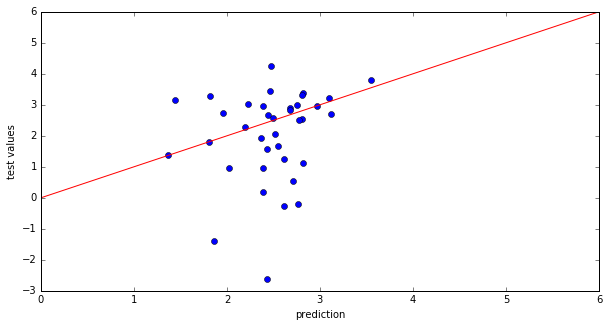

In [38]:
scores = gd.elastic_net(drugid, alpha=0.1, n_folds=10, show=True)
plot([0,6],[0,6], 'r')

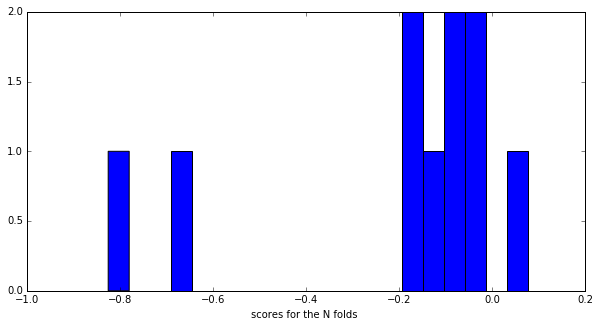

In [39]:
_ = hist(scores,bins=20); xlabel('scores for the N folds ')

We see here that scores are pretty bad (zero or even less)

If we try another value (0.01), we get better results

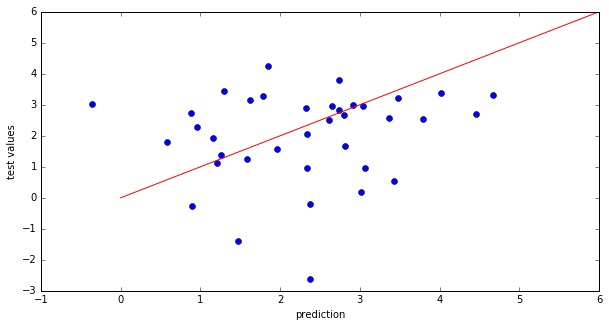

In [40]:
scores = gd.elastic_net(drugid, alpha=0.01, n_folds=10, show=True)
plot([0,6], [0,6],'r')

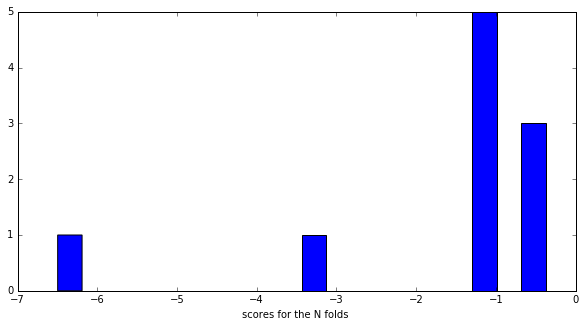

In [41]:
_ = hist(scores,bins=20); xlabel('scores for the N folds ')

Now the question is how to get the alpha value?

/home/cokelaer/anaconda2/envs/py35/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:466: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations
  ConvergenceWarning)


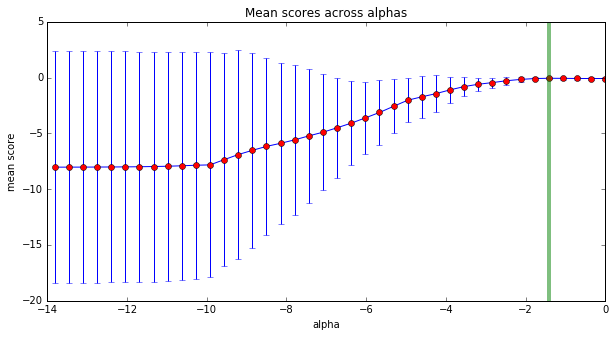

In [42]:
alphas, all_scores, maximum, alpha_best = gd.tune_alpha(drugid, 
                            alphas=logspace(-6,0,40), n_folds=10)

In [43]:
alpha_best

0.24244620170823308

In [44]:
log(alpha_best)

-1.4169754418424887

This is not instateneous but can be speed up by preventing the plotting, or playing on the number of alphas or the number of N_folds

In [45]:
res = gd.tune_alpha(drugid, alphas=logspace(-6,0,40), n_folds=10, show=False)

/home/cokelaer/anaconda2/envs/py35/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:466: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations
  ConvergenceWarning)


In [46]:
res = gd.tune_alpha(drugid, alphas=logspace(-6,0,20), n_folds=4, show=False)


/home/cokelaer/anaconda2/envs/py35/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:466: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations
  ConvergenceWarning)


/home/cokelaer/anaconda2/envs/py35/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:466: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations
  ConvergenceWarning)


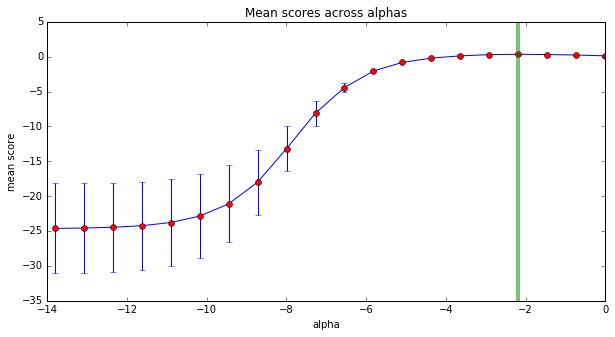

In [15]:
res = gd.tune_alpha(1047, alphas=logspace(-6,0,20), n_folds=4, show=True)


Using only 4 folds and 20 alphas decrease the computing time to 286ms instead of 1.34s

Another method to identify the best alpha is to use the method based on concordance index. Although it is much longer to compute, it may be interesting for further detailled analysis

/home/cokelaer/anaconda2/envs/py35/lib/python3.5/importlib/_bootstrap.py:222: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


 [---------        25%                  ] 5 of 20 complete in 5.0 sec

/home/cokelaer/anaconda2/envs/py35/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:466: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations
  ConvergenceWarning)


 [-----------------95%----------------  ] 19 of 20 complete in 25.9 sec

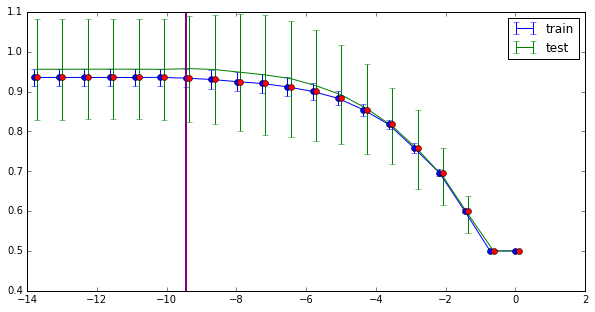

In [47]:
CI_best_alpha = gd.plot_cindex(drugid, pylab.logspace(-6,0,20))

In [48]:
log(CI_best_alpha)

-9.4527177501860837

This is much longer that tuning_alpha method. The other point is that the 2 values
found differe slightly from -4.9 to -5.8 In this case, the CI values 
from -14 to -6 are pretty flat and may not be so precise as compare to the other
method.


Coming back on the previous value of 0.000701, let re-run the elastic net with this value:

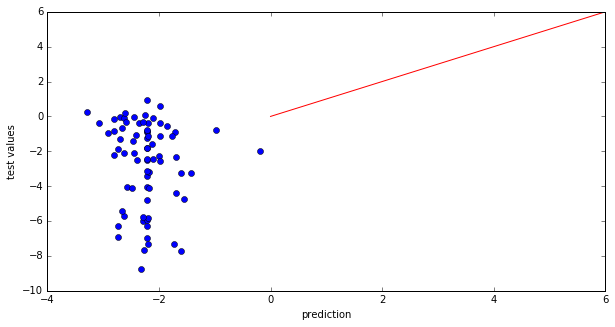

In [59]:
scores = gd.elastic_net(drugid, alpha=0.25,n_folds=5, show=True)
plot([0,6],[0,6],'r')

We can also now look at the weights for that model:
    

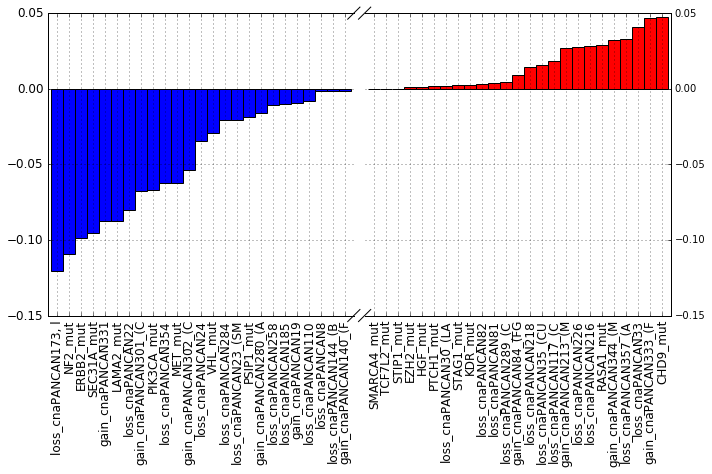

In [68]:
weights = gd.plot_weight(119, alpha=0.15)

/home/cokelaer/Work/github/gdsctools/gdsctools/elastic_net.py:430: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


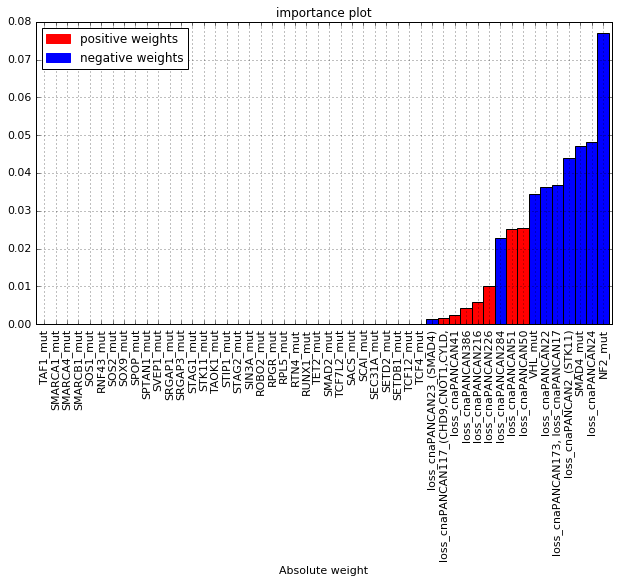

In [57]:
importance = gd.plot_importance(drugid, alpha=0.25)


In [35]:
drugs = gd.ic50.drugIds

In [37]:
res = gd.tune_alpha(drugs[0], alphas=logspace(-6,0,20), n_folds=4, show=False)
res[3]

/home/cokelaer/anaconda2/envs/py35/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:466: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations
  ConvergenceWarning)


0.23357214690901212